In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
df = pd.read_csv(r"C:\Users\DanFennell\OneDrive - Fennells\Documents 1\Projects\clubs.csv")

In [3]:
df.head(10)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,27,27.9,15,55.6,6,Yekaterinburg Arena,23000,€-895k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,35,26.7,17,48.6,13,Tüpraş Stadyumu,42590,€-26.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
5,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,NaN,29,25.4,18,62.1,9,KAA Gent Arena,19999,+€32.72m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...
6,1894,hvidovre-if,Hvidovre Idrætsforening,DK1,NaN,24,27.2,3,12.5,3,PRO VENTILATION Arena,12000,+€335k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/hvidovre-if/st...
7,190,fc-kopenhagen,Football Club København,DK1,NaN,28,26.1,15,53.6,9,Parken,38065,+€6.88m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...
8,192,roda-jc-kerkrade,Roda JC Kerkrade,NL1,NaN,25,24.0,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/roda-jc-kerkra...
9,19789,yeni-malatyaspor,Yeni Malatyaspor,TR1,NaN,10,22.9,1,10.0,0,Yeni Malatya Stadyumu,25745,+€778k,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/yeni-malatyasp...


In [4]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  426 non-null    int64  
 1   club_code                426 non-null    object 
 2   name                     426 non-null    object 
 3   domestic_competition_id  426 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               426 non-null    int64  
 6   average_age              388 non-null    float64
 7   foreigners_number        426 non-null    int64  
 8   foreigners_percentage    378 non-null    float64
 9   national_team_players    426 non-null    int64  
 10  stadium_name             426 non-null    object 
 11  stadium_seats            426 non-null    int64  
 12  net_transfer_record      426 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [5]:
# Drop the columns with no values as we don't need them
df.drop(["total_market_value","coach_name"], axis = 1, inplace = True)

In [6]:
# Select only the top 5 leagues in Europe: Premier League, Ligue 1, Serie A, Bundesliga and La Liga
df = df.loc[(df["domestic_competition_id"] == "L1") | (df["domestic_competition_id"] =="GB1") | 
                       (df["domestic_competition_id"] =="FR1") | (df["domestic_competition_id"] =="IT1") | 
                       (df["domestic_competition_id"] =="ES1")]

In [7]:
df.head()

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
3,12,as-rom,Associazione Sportiva Roma,IT1,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
20,4795,fc-ingolstadt-04,FC Ingolstadt 04,L1,28,24.3,8,28.6,1,Audi Sportpark,15800,+€1.55m,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/fc-ingolstadt-...
22,5358,sd-huesca,SD Huesca,ES1,24,27.5,8,33.3,2,El Alcoraz,9128,+€1.43m,2020,../data/raw/transfermarkt-scraper/2020/clubs.j...,https://www.transfermarkt.co.uk/sd-huesca/star...


In [8]:
# Get the teams that were in the top division in 2023 only so we can analyse just the 2023 season
df = df.loc[df["last_season"] == 2023]

In [9]:
# Find the average age per league
df.groupby("domestic_competition_id").average_age.mean().sort_values(ascending = False)

domestic_competition_id
ES1    27.055000
GB1    26.265000
IT1    26.255000
L1     25.811111
FR1    25.194444
Name: average_age, dtype: float64

In [11]:
# Find the % of foreign players per league
df.groupby("domestic_competition_id").foreigners_percentage.mean().sort_values(ascending = False)

domestic_competition_id
GB1    68.075000
IT1    63.580000
FR1    60.727778
L1     48.988889
ES1    41.905000
Name: foreigners_percentage, dtype: float64

In [12]:
# Having the correct league names makes it easier to read so I will use mapping to add the names
mapping_dict = {"GB1": "Premier League", "FR1": "Ligue 1", "IT1": "Serie A", "L1": "Bundesliga", "ES1": "La Liga"}

In [13]:
df["league_name"] = df["domestic_competition_id"].map(mapping_dict)

In [14]:
# Now we have correct league names to make it easier to understand the data
df

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...,Bundesliga
3,12,as-rom,Associazione Sportiva Roma,IT1,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,Serie A
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
29,969,montpellier-hsc,Montpellier Hérault Sport Club,FR1,25,25.5,12,48.0,8,Stade de la Mosson,32939,+€28.60m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/montpellier-hs...,Ligue 1
30,989,afc-bournemouth,Association Football Club Bournemouth,GB1,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,27,fc-bayern-munchen,FC Bayern München,L1,27,26.7,16,59.3,19,Allianz Arena,75024,€-14.25m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-bayern-munc...,Bundesliga
407,29,fc-everton,Everton Football Club,GB1,25,27.2,11,44.0,7,Goodison Park,39571,+€42.30m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-everton/sta...,Premier League
412,347,fc-metz,Football Club de Metz,FR1,28,25.0,21,75.0,10,Stade Saint-Symphorien,28786,+€23.70m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-metz/starts...,Ligue 1
418,533,tsg-1899-hoffenheim,TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH,L1,28,25.3,12,42.9,13,PreZero Arena,30150,€-6.55m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tsg-1899-hoffe...,Bundesliga


In [15]:
# Average age per League
avg_age = df.groupby("league_name")["average_age"].mean().sort_values(ascending = True)
avg_age

league_name
Ligue 1           25.194444
Bundesliga        25.811111
Serie A           26.255000
Premier League    26.265000
La Liga           27.055000
Name: average_age, dtype: float64

In [16]:
# Average % of foreign players per league
avg_foreign_players = df.groupby("league_name")["foreigners_percentage"].mean().sort_values(ascending = True)
avg_foreign_players

league_name
La Liga           41.905000
Bundesliga        48.988889
Ligue 1           60.727778
Serie A           63.580000
Premier League    68.075000
Name: foreigners_percentage, dtype: float64

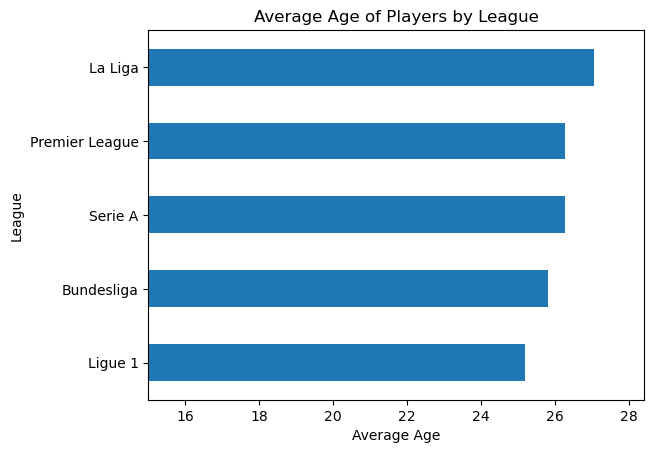

In [17]:
avg_age.plot(kind="barh", x="average_age", y="league_name")
# Start the x-axis at 15
plt.xlim(15, None)
plt.xlabel("Average Age")
plt.ylabel("League")
plt.title("Average Age of Players by League")
plt.show()

La Liga has the oldest players on average with an average age of 27. Ligue 1 has the youngest with 25.

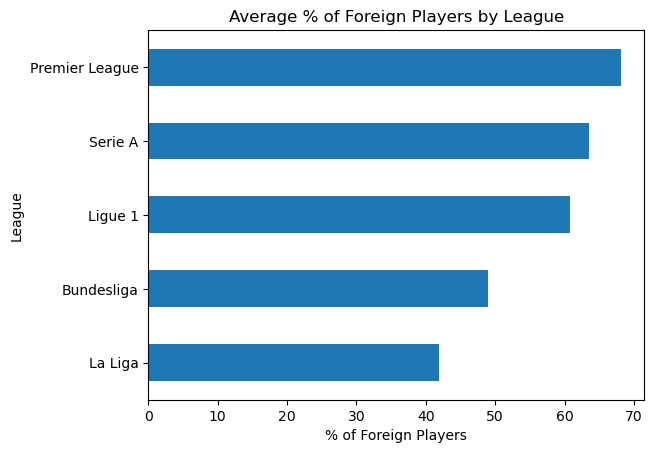

In [18]:
avg_foreign_players.plot(kind="barh", x="avg_foreign players", y="league_name")
plt.xlabel("% of Foreign Players")
plt.ylabel("League")
plt.title("Average % of Foreign Players by League")
plt.show()

The Premier League has the highest % of foreign players with teams on average having a squad where 68% of players are foreign.
La Liga has much fewer with around 42%.

### Analysing the Premier League

In [19]:
prem_clubs = df.loc[(df["league_name"] == "Premier League")]

In [20]:
prem_clubs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 4 to 407
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  20 non-null     int64  
 1   club_code                20 non-null     object 
 2   name                     20 non-null     object 
 3   domestic_competition_id  20 non-null     object 
 4   squad_size               20 non-null     int64  
 5   average_age              20 non-null     float64
 6   foreigners_number        20 non-null     int64  
 7   foreigners_percentage    20 non-null     float64
 8   national_team_players    20 non-null     int64  
 9   stadium_name             20 non-null     object 
 10  stadium_seats            20 non-null     int64  
 11  net_transfer_record      20 non-null     object 
 12  last_season              20 non-null     int64  
 13  filename                 20 non-null     object 
 14  url                      20 non-

In [21]:
prem_clubs.average_age.mean()

26.265000000000004

In [22]:
# removing the football club at the end of the names to make visualizations more readable
prem_clubs['name'] = prem_clubs['name'].str.replace("Football Club", "")

C:\Users\DanFennell\AppData\Local\Temp\ipykernel_16776\1176338079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_clubs['name'] = prem_clubs['name'].str.replace("Football Club", "")


In [23]:
average_age = prem_clubs.sort_values(by="average_age", ascending=True)

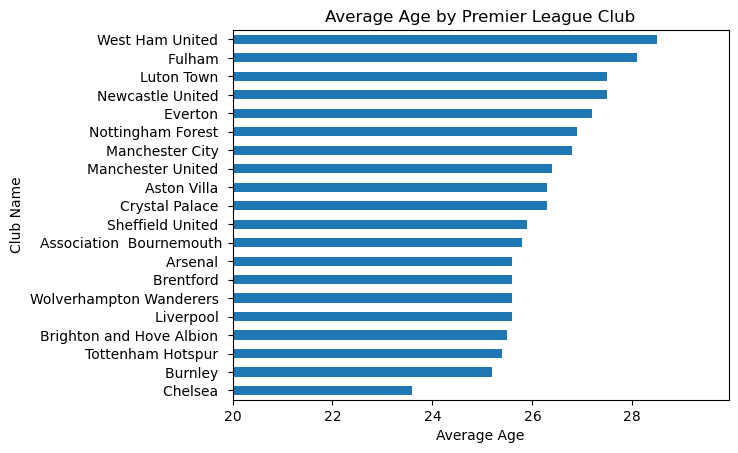

In [24]:
average_age.plot(x="name", y="average_age", kind = "barh", legend=False)
plt.ylabel("Club Name")
plt.xlabel("Average Age")
# Start the x-axis at 20
plt.xlim(20, None)
plt.title("Average Age by Premier League Club")
plt.show()

West ham have the oldest squad on average with an average age of 28.5 whera Chelsea have the youngest squad with an average age of 23.6

In [25]:
prem_clubs.sort_values(by="foreigners_percentage", ascending=False)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
217,931,fc-fulham,Fulham,GB1,24,28.1,22,91.7,15,Craven Cottage,25700,€-15.27m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-fulham/star...,Premier League
135,703,nottingham-forest,Nottingham Forest,GB1,28,26.9,24,85.7,16,The City Ground,30445,€-48.23m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/nottingham-for...,Premier League
336,543,wolverhampton-wanderers,Wolverhampton Wanderers,GB1,23,25.6,19,82.6,14,Molineux Stadium,32050,+€75.20m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/wolverhampton-...,Premier League
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
171,1148,fc-brentford,Brentford,GB1,30,25.6,23,76.7,18,Gtech Community Stadium,17250,€-62.26m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-brentford/s...,Premier League
244,1132,fc-burnley,Burnley,GB1,29,25.2,22,75.9,11,Turf Moor,21994,€-107.25m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-burnley/sta...,Premier League
43,31,fc-liverpool,Liverpool,GB1,28,25.6,21,75.0,18,Anfield,54074,€-111.30m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...,Premier League
329,281,manchester-city,Manchester City,GB1,22,26.8,16,72.7,19,Etihad Stadium,55017,€-133.80m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/manchester-cit...,Premier League
321,11,fc-arsenal,Arsenal,GB1,25,25.6,18,72.0,20,Emirates Stadium,60704,€-167.04m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-arsenal/sta...,Premier League
86,1237,brighton-amp-hove-albion,Brighton and Hove Albion,GB1,27,25.5,19,70.4,16,AMEX Stadium,31800,+€86.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/brighton-amp-h...,Premier League


In [26]:
prem_clubs.foreigners_percentage.mean()

68.07499999999999

In [27]:
foreign_percentage = prem_clubs.loc[:, ["name","foreigners_percentage"]].sort_values(by="foreigners_percentage", ascending=True)

<Figure size 1200x800 with 0 Axes>

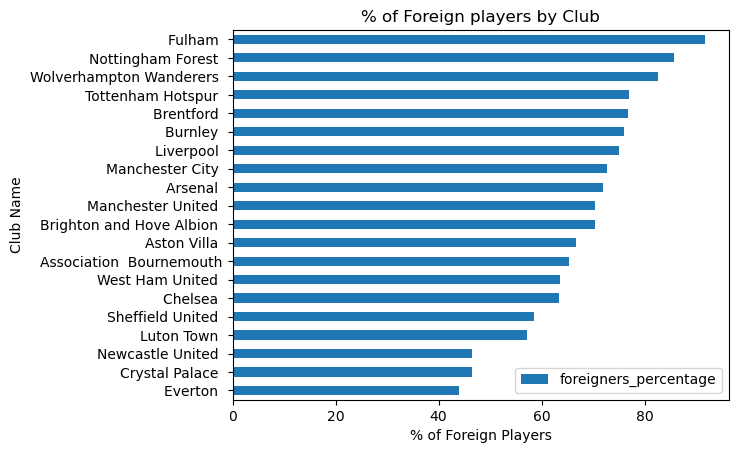

In [28]:
plt.figure(figsize=(12,8))
foreign_percentage.plot(x="name", y="foreigners_percentage", kind="barh")
plt.title("% of Foreign players by Club")
plt.xlabel("% of Foreign Players")
plt.ylabel("Club Name")
plt.show()

Fulham have a very high number of foreign players. 91.7% of their team are foreign players. Everton have the fewest, with 44% of their squad being foreigners.

In [29]:
# Trying to sort the net_transfer record values descending. However it isn't working
prem_clubs.sort_values(by = "net_transfer_record", ascending = False)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
333,405,aston-villa,Aston Villa,GB1,27,26.3,18,66.7,16,Villa Park,42682,€-78.95m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/aston-villa/st...,Premier League
194,873,crystal-palace,Crystal Palace,GB1,28,26.3,13,46.4,9,Selhurst Park,26047,€-67.80m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/crystal-palace...,Premier League
171,1148,fc-brentford,Brentford,GB1,30,25.6,23,76.7,18,Gtech Community Stadium,17250,€-62.26m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-brentford/s...,Premier League
135,703,nottingham-forest,Nottingham Forest,GB1,28,26.9,24,85.7,16,The City Ground,30445,€-48.23m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/nottingham-for...,Premier League
354,350,sheffield-united,Sheffield United,GB1,29,25.9,17,58.6,9,Bramall Lane,32702,€-36.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sheffield-unit...,Premier League
138,1031,luton-town,Luton Town,GB1,28,27.5,16,57.1,10,Kenilworth Road,11050,€-25.62m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/luton-town/sta...,Premier League
392,631,fc-chelsea,Chelsea,GB1,30,23.6,19,63.3,17,Stamford Bridge,40853,€-198.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-chelsea/sta...,Premier League
321,11,fc-arsenal,Arsenal,GB1,25,25.6,18,72.0,20,Emirates Stadium,60704,€-167.04m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-arsenal/sta...,Premier League
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
217,931,fc-fulham,Fulham,GB1,24,28.1,22,91.7,15,Craven Cottage,25700,€-15.27m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-fulham/star...,Premier League


In [30]:
# On further inspection, we can see the values are stored as objects. We need them as floats
prem_clubs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 4 to 407
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  20 non-null     int64  
 1   club_code                20 non-null     object 
 2   name                     20 non-null     object 
 3   domestic_competition_id  20 non-null     object 
 4   squad_size               20 non-null     int64  
 5   average_age              20 non-null     float64
 6   foreigners_number        20 non-null     int64  
 7   foreigners_percentage    20 non-null     float64
 8   national_team_players    20 non-null     int64  
 9   stadium_name             20 non-null     object 
 10  stadium_seats            20 non-null     int64  
 11  net_transfer_record      20 non-null     object 
 12  last_season              20 non-null     int64  
 13  filename                 20 non-null     object 
 14  url                      20 non-

In [31]:
# First, we need to strip the currency symbols and also the trailing "m", then convert it to the float64 data type
prem_clubs["net_transfer_record"] = prem_clubs.net_transfer_record.str.replace("€", "").str.replace("m", "").astype("float64")

C:\Users\DanFennell\AppData\Local\Temp\ipykernel_16776\3164027002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_clubs["net_transfer_record"] = prem_clubs.net_transfer_record.str.replace("€", "").str.replace("m", "").astype("float64")


In [32]:
# successfully created a new column
prem_clubs.head()

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,-151.40,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
30,989,afc-bournemouth,Association Bournemouth,GB1,26,25.8,17,65.4,12,Vitality Stadium,11329,-125.79,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...,Premier League
43,31,fc-liverpool,Liverpool,GB1,28,25.6,21,75.0,18,Anfield,54074,-111.30,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...,Premier League
86,1237,brighton-amp-hove-albion,Brighton and Hove Albion,GB1,27,25.5,19,70.4,16,AMEX Stadium,31800,86.40,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/brighton-amp-h...,Premier League
135,703,nottingham-forest,Nottingham Forest,GB1,28,26.9,24,85.7,16,The City Ground,30445,-48.23,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/nottingham-for...,Premier League


In [33]:
# Now the sorting works
prem_clubs.sort_values(by = "net_transfer_record", ascending = True, inplace = True)
prem_clubs

C:\Users\DanFennell\AppData\Local\Temp\ipykernel_16776\2032388156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_clubs.sort_values(by = "net_transfer_record", ascending = True, inplace = True)


,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
392,631,fc-chelsea,Chelsea,GB1,30,23.6,19,63.3,17,Stamford Bridge,40853,-198.40,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-chelsea/sta...,Premier League
321,11,fc-arsenal,Arsenal,GB1,25,25.6,18,72.0,20,Emirates Stadium,60704,-167.04,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-arsenal/sta...,Premier League
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,-151.40,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
242,985,manchester-united,Manchester United,GB1,27,26.4,19,70.4,20,Old Trafford,74879,-146.96,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/manchester-uni...,Premier League
329,281,manchester-city,Manchester City,GB1,22,26.8,16,72.7,19,Etihad Stadium,55017,-133.80,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/manchester-cit...,Premier League
30,989,afc-bournemouth,Association Bournemouth,GB1,26,25.8,17,65.4,12,Vitality Stadium,11329,-125.79,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...,Premier League
43,31,fc-liverpool,Liverpool,GB1,28,25.6,21,75.0,18,Anfield,54074,-111.30,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...,Premier League
166,762,newcastle-united,Newcastle United,GB1,28,27.5,13,46.4,12,St James' Park,52338,-108.60,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/newcastle-unit...,Premier League
244,1132,fc-burnley,Burnley,GB1,29,25.2,22,75.9,11,Turf Moor,21994,-107.25,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-burnley/sta...,Premier League
333,405,aston-villa,Aston Villa,GB1,27,26.3,18,66.7,16,Villa Park,42682,-78.95,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/aston-villa/st...,Premier League


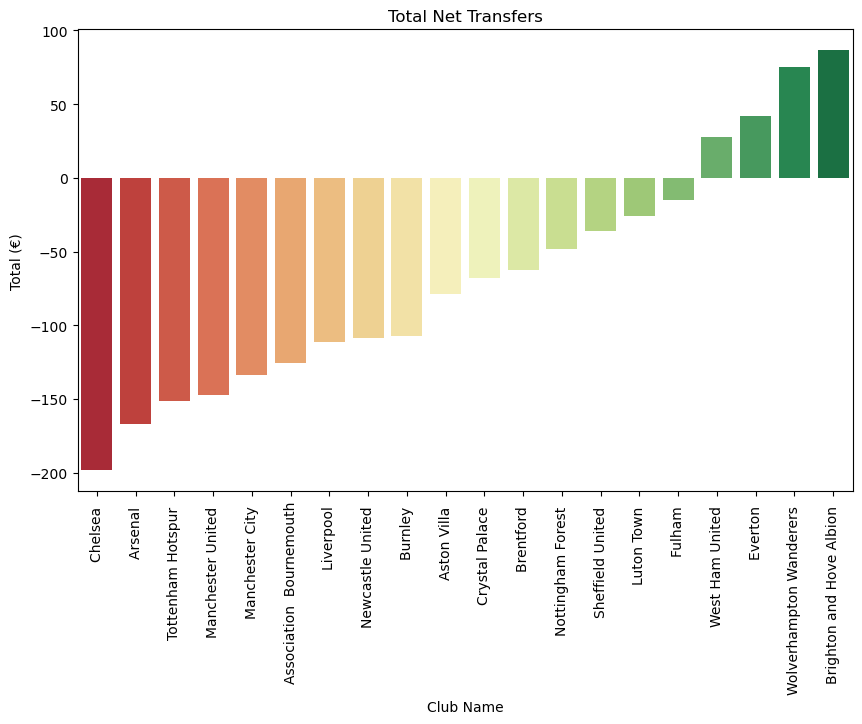

In [34]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=prem_clubs, x="name", y="net_transfer_record",palette="RdYlGn")
plt.title("Total Net Transfers")
plt.xlabel("Club Name")
plt.ylabel("Total (€)")
plt.xticks(rotation=90)
plt.show()

Chelsea have the worst net spend with €-198M. Brighton have the best net spend with €86.4M

In [35]:
df.head(100)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...,Bundesliga
3,12,as-rom,Associazione Sportiva Roma,IT1,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,Serie A
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
29,969,montpellier-hsc,Montpellier Hérault Sport Club,FR1,25,25.5,12,48.0,8,Stade de la Mosson,32939,+€28.60m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/montpellier-hs...,Ligue 1
30,989,afc-bournemouth,Association Football Club Bournemouth,GB1,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,27,fc-bayern-munchen,FC Bayern München,L1,27,26.7,16,59.3,19,Allianz Arena,75024,€-14.25m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-bayern-munc...,Bundesliga
407,29,fc-everton,Everton Football Club,GB1,25,27.2,11,44.0,7,Goodison Park,39571,+€42.30m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-everton/sta...,Premier League
412,347,fc-metz,Football Club de Metz,FR1,28,25.0,21,75.0,10,Stade Saint-Symphorien,28786,+€23.70m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-metz/starts...,Ligue 1
418,533,tsg-1899-hoffenheim,TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH,L1,28,25.3,12,42.9,13,PreZero Arena,30150,€-6.55m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tsg-1899-hoffe...,Bundesliga


In [ ]:
## Ran into an error doing this as could not convert string '+-0' to float. Row 234
df["net_transfer_record"] = df.net_transfer_record.str.replace("€", "").str.replace("m", "").astype("float64")

In [36]:
# Reset the index 
df.reset_index().drop(columns="index")

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...,Bundesliga
1,12,as-rom,Associazione Sportiva Roma,IT1,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,Serie A
2,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,Premier League
3,969,montpellier-hsc,Montpellier Hérault Sport Club,FR1,25,25.5,12,48.0,8,Stade de la Mosson,32939,+€28.60m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/montpellier-hs...,Ligue 1
4,989,afc-bournemouth,Association Football Club Bournemouth,GB1,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,27,fc-bayern-munchen,FC Bayern München,L1,27,26.7,16,59.3,19,Allianz Arena,75024,€-14.25m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-bayern-munc...,Bundesliga
92,29,fc-everton,Everton Football Club,GB1,25,27.2,11,44.0,7,Goodison Park,39571,+€42.30m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-everton/sta...,Premier League
93,347,fc-metz,Football Club de Metz,FR1,28,25.0,21,75.0,10,Stade Saint-Symphorien,28786,+€23.70m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-metz/starts...,Ligue 1
94,533,tsg-1899-hoffenheim,TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH,L1,28,25.3,12,42.9,13,PreZero Arena,30150,€-6.55m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tsg-1899-hoffe...,Bundesliga


In [37]:
# Found the row with wrong value
df.loc[df["name"] == "Athletic Club Bilbao"]

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,league_name
234,621,athletic-bilbao,Athletic Club Bilbao,ES1,25,27.2,1,4.0,5,San Mamés,53289,+-0,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/athletic-bilba...,La Liga


In [38]:
# Change the value to 0 in string format
df.loc[df["name"] == "Athletic Club Bilbao", "net_transfer_record"] = "0"

In [39]:
# Change value from strings to floats. It now works
df["net_transfer_record"] = df.net_transfer_record.str.replace("€", "").str.replace("m", "").str.replace("k", "").astype("float64")

In [40]:
net_transfer_leagues = df.groupby("league_name")["net_transfer_record"].sum().sort_values(ascending=True).reset_index()
net_transfer_leagues

,league_name,net_transfer_record
0,Premier League,-1352.82
1,La Liga,-690.61
2,Ligue 1,-62.17
3,Serie A,164.59
4,Bundesliga,419.55


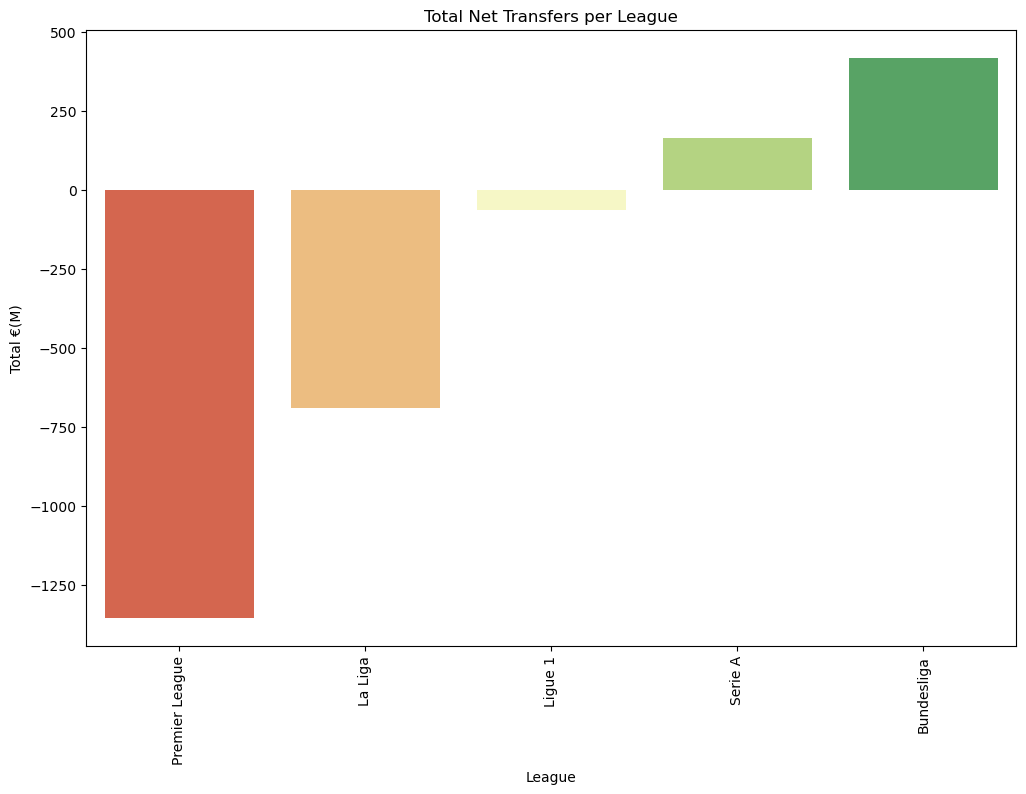

In [41]:
# Plot the net_transfer records
plt.figure(figsize=(12,8))
sns.barplot(data=net_transfer_leagues, x="league_name", y="net_transfer_record",palette="RdYlGn")
plt.title("Total Net Transfers per League")
plt.xticks(rotation=90)
plt.xlabel("League")
plt.ylabel("Total €(M)")
plt.show()

The Premier League has by far the worst net transfer record of the top 5 league with €-1.3 billion, whilst the Bundesliga has a positive net transfer record with €419 million.